<a href="https://www.kaggle.com/code/rafaellciomartins/trabalho-2-lp?scriptVersionId=114174625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, Binarizer, OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, plot_roc_curve
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
cols = ["TransactionID", "TransactionAmt","TransactionDT", "ProductCD","card4", "card6", "isFraud"]

train_transaction = pd.read_csv("../input/ieee-fraud-detection/train_transaction.csv", usecols=cols)
test_transaction = pd.read_csv("../input/ieee-fraud-detection/test_transaction.csv", usecols= [col for col in cols if col != 'isFraud'])

train_identity = pd.read_csv("../input/ieee-fraud-detection/train_identity.csv")
test_identity = pd.read_csv("../input/ieee-fraud-detection/test_identity.csv")

train = pd.merge(train_transaction, train_identity, on = 'TransactionID', how = 'left')
test = pd.merge(test_transaction,test_identity, on = 'TransactionID', how = 'left')

In [4]:
print('train:',train.shape)
print('test:', test.shape)

train: (590540, 47)
test: (506691, 46)


In [4]:
# Data Transformation
## dropping nulls
train.dropna(thresh=train.shape[0]*0.5,how='all',axis=1, inplace=True)
test = test[[col for col in list(train.columns) if col != 'isFraud']]

## filling nulls
train = train.fillna(train.mode().iloc[0])

## normalization, standardization
continuous = train.select_dtypes(include=[np.number]).columns # all continuous columns
categorical = train.select_dtypes(exclude=[np.number]).columns 
train[continuous] = (train[continuous]-train[continuous].mean())/train[continuous].std() 
train[continuous] = (train[continuous]-train[continuous].min())/(train[continuous].max()-train[continuous].min())

In [6]:
def evaluate_supervised_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    ra_score = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print('Acurácia: ', accuracy)
    print('Precisão: ', precision)
    print('Recall: ', recall)
    print('ROC AUC Score: ', ra_score)
    print('F1: ', f1)
    print('Curva ROC:\n')
    plot_roc_curve(model, X_test, y_test)
    
    return {'Acurácia':accuracy, 'Precisão':precision, 'Recall': recall, 'ROC AUC Score':ra_score, 'F1':f1}

In [114]:
da = pd.DataFrame()
da.append({'ácia':1,'b':2,'b':3}, ignore_index=True)

,ácia,b
0,1.0,3.0



Decision Tree Classifier - No resampling
Acurácia:  0.96123039929556
Precisão:  0.45013357079252003
Recall:  0.48946986201888165
ROC AUC Score:  0.7338994115625349
F1:  0.4689783138118984
Curva ROC:

   Acurácia  Precisão   Recall  ROC AUC Score        F1
0   0.96123  0.450134  0.48947       0.733899  0.468978

Decision Tree Classifier - Undersampling


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Acurácia:  0.722235664166465
Precisão:  0.7147790055248618
Recall:  0.7460355598270062
ROC AUC Score:  0.7220674875158423
F1:  0.7300728897249
Curva ROC:


Decision Tree Classifier - Oversampling


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Acurácia:  0.9879842597751272
Precisão:  0.9765550771653813
Recall:  1.0
ROC AUC Score:  0.9879723878696328
F1:  0.9881384925188922
Curva ROC:

   Acurácia  Precisão    Recall  ROC AUC Score        F1
0  0.961230  0.450134  0.489470       0.733899  0.468978
1  0.722236  0.714779  0.746036       0.722067  0.730073
2  0.987984  0.976555  1.000000       0.987972  0.988138


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


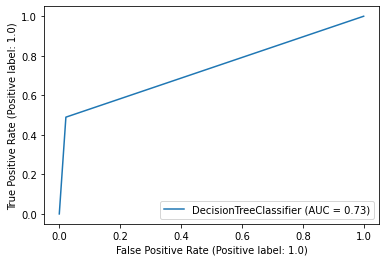

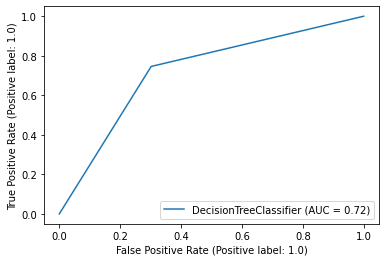

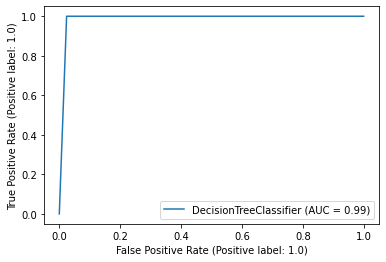

In [7]:
# Supervised learning - Decision Tree Classifier
features = ["TransactionID", "TransactionAmt","TransactionDT", "ProductCD","card4", "card6"]
target = 'isFraud'
#Data split - No sampling
X = train[features]
y = train[target]

decision_tree_results = pd.DataFrame()

print('\nDecision Tree Classifier - No resampling')
dtc = DecisionTreeClassifier()
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

new_results = evaluate_supervised_model(dtc, X_train, X_test, y_train, y_test)
decision_tree_results = decision_tree_results.append(new_results, ignore_index=True)

print(decision_tree_results)

print('\nDecision Tree Classifier - Undersampling')
dtc = DecisionTreeClassifier()
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)
X_rus = pd.get_dummies(X_rus)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.20)
new_results = evaluate_supervised_model(dtc, X_train_rus, X_test_rus, y_train_rus, y_test_rus)
decision_tree_results = decision_tree_results.append(new_results, ignore_index=True)

print('\nDecision Tree Classifier - Oversampling')
dtc = DecisionTreeClassifier()

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
X_ros = pd.get_dummies(X_ros)

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.20)

new_results = evaluate_supervised_model(dtc, X_train_ros, X_test_ros, y_train_ros, y_test_ros)
decision_tree_results = decision_tree_results.append(new_results, ignore_index=True)

print(decision_tree_results)


Random Forest Classifier - No resampling
Acurácia:  0.9711281200257391
Precisão:  0.6612844036697247
Recall:  0.4201445558405223
ROC AUC Score:  0.7060175946072818
F1:  0.5138294838893641
Curva ROC:



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


   Acurácia  Precisão    Recall  ROC AUC Score        F1
0  0.971128  0.661284  0.420145       0.706018  0.513829

Random Forest Classifier - Undersampling
Acurácia:  0.7486087587708686
Precisão:  0.7353282301090234
Recall:  0.7718529340150961
ROC AUC Score:  0.7487540697966801
F1:  0.7531480161558565
Curva ROC:



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)



Random Forest Classifier - Oversampling
Acurácia:  0.9909234879425841
Precisão:  0.9821291297775858
Recall:  1.0
ROC AUC Score:  0.9909448991203116
F1:  0.9909840030329308
Curva ROC:



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


   Acurácia  Precisão    Recall  ROC AUC Score        F1
0  0.971128  0.661284  0.420145       0.706018  0.513829
1  0.748609  0.735328  0.771853       0.748754  0.753148
2  0.990923  0.982129  1.000000       0.990945  0.990984


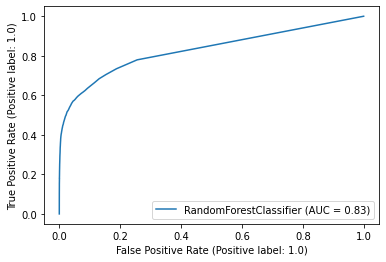

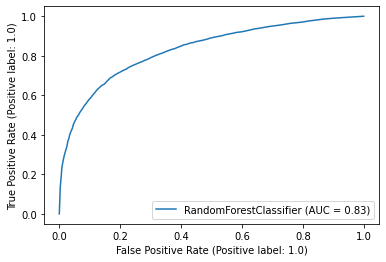

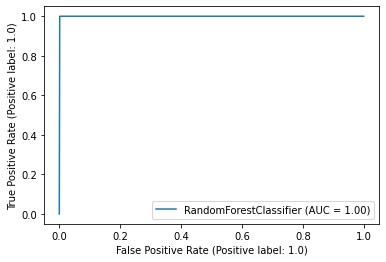

In [8]:
# Supervised learning - Random Forest Classifier
random_forest_results = pd.DataFrame()

print('\nRandom Forest Classifier - No resampling')

rfc = RandomForestClassifier()
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

new_results = evaluate_supervised_model(rfc, X_train, X_test, y_train, y_test)
random_forest_results = random_forest_results.append(new_results, ignore_index=True)

print(random_forest_results)

print('\nRandom Forest Classifier - Undersampling')
rfc = RandomForestClassifier()

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)
X_rus = pd.get_dummies(X_rus)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.20)

new_results = evaluate_supervised_model(rfc, X_train_rus, X_test_rus, y_train_rus, y_test_rus)
random_forest_results = random_forest_results.append(new_results, ignore_index=True)

print('\nRandom Forest Classifier - Oversampling')
rfc = RandomForestClassifier()

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
X_ros = pd.get_dummies(X_ros)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.20)

new_results = evaluate_supervised_model(rfc, X_train_ros, X_test_ros, y_train_ros, y_test_ros)
random_forest_results = random_forest_results.append(new_results, ignore_index=True)

print(random_forest_results)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette Score(n=2): <function silhouette_score at 0x7fb1736f79e0>
Calinski-Harabasz score(n=2): 49709.206199362256
   Sillhuette Score  Calinski-Harabasz Score
0          0.387373             49709.206199 {'Sillhuette Score': 0.38737335353121033, 'Calinski-Harabasz Score': 49709.206199362256}


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette Score(n=2): <function silhouette_score at 0x7fb1736f79e0>
Calinski-Harabasz score(n=2): 3594.2990956753265
   Sillhuette Score  Calinski-Harabasz Score
0          0.387373             49709.206199
1          0.347602              3594.299096


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Silhouette Score(n=2): <function silhouette_score at 0x7fb1736f79e0>
Calinski-Harabasz score(n=2): 99528.96261086395
   Sillhuette Score  Calinski-Harabasz Score
0          0.387373             49709.206199
1          0.347602              3594.299096
2          0.346919             99528.962611


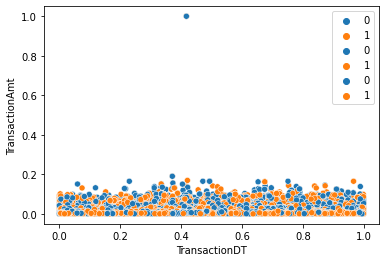

In [17]:
KMean= KMeans(n_clusters=2)

kmeans_results = pd.DataFrame()
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

KMean.fit(X_train)
label=KMean.predict(X_test)

sns.scatterplot(X_test['TransactionDT'], X_test['TransactionAmt'], hue = label)

s_score = silhouette_score(X_test, label)
print(f'Silhouette Score(n=2): {silhouette_score}')

ch_score = calinski_harabasz_score(X_test, label)
print(f'Calinski-Harabasz score(n=2): {ch_score}')

new_results = {'Sillhuette Score': s_score, 'Calinski-Harabasz Score': ch_score}
kmeans_results = kmeans_results.append(new_results, ignore_index=True)

print(kmeans_results, new_results)

KMean= KMeans(n_clusters=2)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,y)
X_rus = pd.get_dummies(X_rus)
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.20)

KMean.fit(X_train_rus)
label=KMean.predict(X_test_rus)

sns.scatterplot(X_test_rus['TransactionDT'], X_test_rus['TransactionAmt'], hue = label)

s_score = silhouette_score(X_test_rus, label)
print(f'Silhouette Score(n=2): {silhouette_score}')

ch_score = calinski_harabasz_score(X_test_rus, label)
print(f'Calinski-Harabasz score(n=2): {ch_score}')

new_results = {'Sillhuette Score': s_score, 'Calinski-Harabasz Score': ch_score}
kmeans_results = kmeans_results.append(new_results, ignore_index=True)
print(kmeans_results)

KMean= KMeans(n_clusters=2)
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
X_ros = pd.get_dummies(X_ros)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.20)

KMean.fit(X_train_ros)
label=KMean.predict(X_test_ros)

sns.scatterplot(X_test_ros['TransactionDT'], X_test_ros['TransactionAmt'], hue = label)

s_score = silhouette_score(X_test_ros, label)
print(f'Silhouette Score(n=2): {silhouette_score}')

ch_score = calinski_harabasz_score(X_test_ros, label)
print(f'Calinski-Harabasz score(n=2): {ch_score}')

new_results = {'Sillhuette Score': s_score, 'Calinski-Harabasz Score': ch_score}
kmeans_results = kmeans_results.append(new_results, ignore_index=True)
print(kmeans_results)

In [18]:
print(decision_tree_results)
print(random_forest_results)
print(kmeans_results)

   Acurácia  Precisão    Recall  ROC AUC Score        F1
0  0.961230  0.450134  0.489470       0.733899  0.468978
1  0.722236  0.714779  0.746036       0.722067  0.730073
2  0.987984  0.976555  1.000000       0.987972  0.988138
   Acurácia  Precisão    Recall  ROC AUC Score        F1
0  0.971128  0.661284  0.420145       0.706018  0.513829
1  0.748609  0.735328  0.771853       0.748754  0.753148
2  0.990923  0.982129  1.000000       0.990945  0.990984
   Sillhuette Score  Calinski-Harabasz Score
0          0.387373             49709.206199
1          0.347602              3594.299096
2          0.346919             99528.962611


['Acurácia', 'Precisão', 'Recall', 'ROC AUC Score', 'F1']


<Figure size 720x288 with 0 Axes>

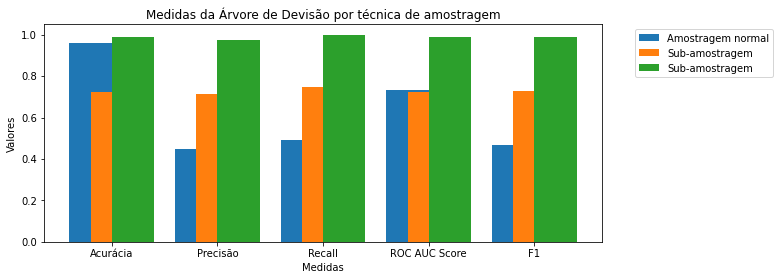

In [13]:
plot_X = list(decision_tree_results.columns)
print(plot_X)

X_axis = np.arange(len(plot_X))
plt.figure().set_figwidth(10)


plt.figure().set_figwidth(10)
plt.bar(X_axis - 0.2, decision_tree_results.iloc[0], 0.4, label= 'Amostragem normal')
plt.bar(X_axis, decision_tree_results.iloc[1] , 0.4, label= 'Sub-amostragem')
plt.bar(X_axis+0.2, decision_tree_results.iloc[2] , 0.4, label= 'Sub-amostragem')

plt.xticks(X_axis, plot_X)
plt.xlabel('Medidas')
plt.ylabel(f'Valores')
plt.title(f'Medidas da Árvore de Devisão por técnica de amostragem')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

['Acurácia', 'Precisão', 'Recall', 'ROC AUC Score', 'F1']


<Figure size 720x288 with 0 Axes>

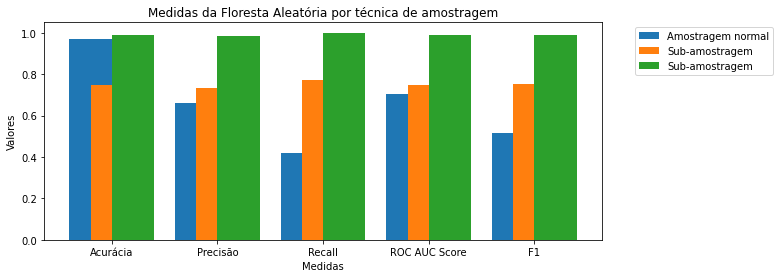

In [14]:
plot_X = list(random_forest_results.columns)
print(plot_X)

X_axis = np.arange(len(plot_X))
plt.figure().set_figwidth(10)


plt.figure().set_figwidth(10)
plt.bar(X_axis - 0.2, random_forest_results.iloc[0], 0.4, label= 'Amostragem normal')
plt.bar(X_axis, random_forest_results.iloc[1] , 0.4, label= 'Sub-amostragem')
plt.bar(X_axis+0.2, random_forest_results.iloc[2] , 0.4, label= 'Sub-amostragem')

plt.xticks(X_axis, plot_X)
plt.xlabel('Medidas')
plt.ylabel(f'Valores')
plt.title(f'Medidas da Floresta Aleatória por técnica de amostragem')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

[0.38737335353121033, 0.34760230144496557, 0.34691890513615586]


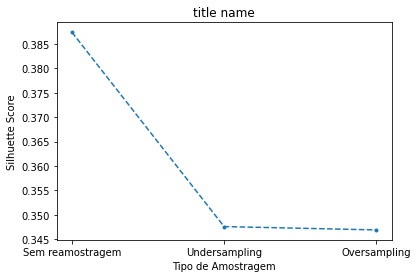

[49709.206199362256, 3594.2990956753265, 99528.96261086395]


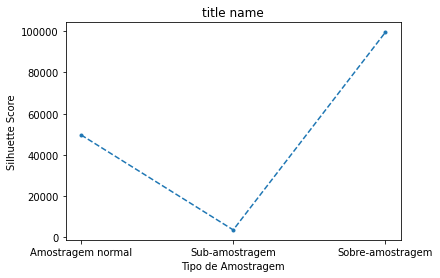

In [33]:
x_axis = ['Sem reamostragem' ,'Undersampling', 'Oversampling']
y_axis = list(kmeans_results['Sillhuette Score'])
print(y_axis)

plt.plot(x_axis, y_axis, marker='.', linestyle='dashed')
plt.title('title name')
plt.xlabel('Tipo de Amostragem')
plt.ylabel('Silhuette Score')
plt.show()

x_axis = ['Amostragem normal' ,'Sub-amostragem', 'Sobre-amostragem']
y_axis = list(kmeans_results['Calinski-Harabasz Score'])
print(y_axis)

plt.plot(x_axis, y_axis, marker='.', linestyle='dashed')
plt.title('title name')
plt.xlabel('Tipo de Amostragem')
plt.ylabel('Silhuette Score')
plt.show()